In [1]:
import pandas as pd
import matplotlib.pyplot as plt
dpi = 200
plt.rcParams['figure.dpi'] = dpi
plt.rcParams['savefig.dpi'] = dpi
plt.style.use(['science','ieee', 'scatter'])
plt.rcParams['figure.figsize'] = 5,5

import numpy as np

In [2]:
%config InlineBackend.figure_format = 'svg'

In [3]:
%%html
<style>
.output_svg div{
  width: 100% !important;
  height: 100% !important;
}
</style>

In [4]:
# observation data
csv = ['obs.txt']
titles = ['obs']

In [5]:
# read observation data.
obs = pd.read_csv(csv[0], header=0, sep = '\t')

obs

,cloud_name,cloud_dir,b_dir_planck,b_dir_optical,mcf_slope,sfr_4,sfr_3
0,Lupus-1,-1,86.0,-82.0,0.188,4.00,0.63
1,Cha-I-III,22,-76.0,NaN,0.165,NaN,1.03
2,Pipe,-45,59.0,49.0,0.165,2.81,NaN
3,IC5146,-38,67.0,64.0,0.231,NaN,0.38
4,Taurus,75,1.0,0.0,0.176,4.76,0.14
5,Musca,27,-82.0,NaN,0.195,NaN,0.90
6,Perseus,32,-84.0,59.0,0.206,7.98,1.46
7,Orion B,-30,-87.0,7.0,0.132,2.19,NaN
8,Orion A,83,59.0,7.0,0.159,5.21,NaN
9,Ophiuchus,-45,-81.0,-65.0,0.096,6.10,2.32


In [6]:
# calculate cloud-field offset

obs['b_offset_planck'] = np.abs(obs[obs.keys()[2]] - obs[obs.keys()[1]])
obs['b_offset_optical'] = np.abs(obs[obs.keys()[3]] - obs[obs.keys()[1]])

obs.loc[obs['b_offset_planck'] > 90, 'b_offset_planck'] = 180 - obs.loc[obs['b_offset_planck'] > 90, 'b_offset_planck'] 
obs.loc[obs['b_offset_optical'] > 90, 'b_offset_optical'] = 180 - obs.loc[obs['b_offset_optical'] > 90, 'b_offset_optical'] 

In [7]:
obs

,cloud_name,cloud_dir,b_dir_planck,b_dir_optical,mcf_slope,sfr_4,sfr_3,b_offset_planck,b_offset_optical
0,Lupus-1,-1,86.0,-82.0,0.188,4.00,0.63,87.0,81.0
1,Cha-I-III,22,-76.0,NaN,0.165,NaN,1.03,82.0,NaN
2,Pipe,-45,59.0,49.0,0.165,2.81,NaN,76.0,86.0
3,IC5146,-38,67.0,64.0,0.231,NaN,0.38,75.0,78.0
4,Taurus,75,1.0,0.0,0.176,4.76,0.14,74.0,75.0
5,Musca,27,-82.0,NaN,0.195,NaN,0.90,71.0,NaN
6,Perseus,32,-84.0,59.0,0.206,7.98,1.46,64.0,27.0
7,Orion B,-30,-87.0,7.0,0.132,2.19,NaN,57.0,37.0
8,Orion A,83,59.0,7.0,0.159,5.21,NaN,24.0,76.0
9,Ophiuchus,-45,-81.0,-65.0,0.096,6.10,2.32,36.0,20.0


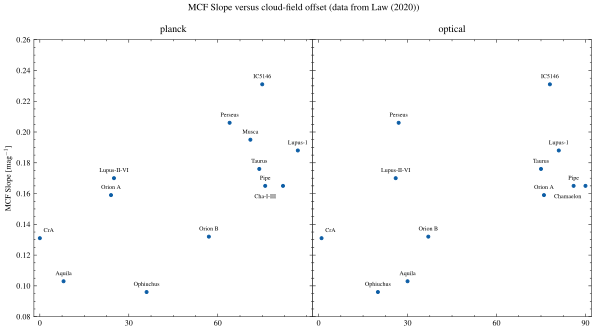

In [7]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5), sharey = True)

names = ['planck', 'optical']

for i, name in enumerate(names):
    ax[i].scatter(obs[f'b_offset_{name}'], obs['mcf_slope'])

    for j, row in obs.iterrows():
        if ~np.isnan(row[f'b_offset_{name}']) and ~np.isnan(row[f'mcf_slope']):
            
            x = row[f'b_offset_{name}']
            y = row['mcf_slope'] + 0.004
            
            if row['cloud_name'] == 'Chamaelon' or row['cloud_name'] == 'Cha-I-III':
                y -= 0.012
                x -= 6
            
            if x < 4:
                x += 3
            
            ax[i].text(x, y, s = row['cloud_name'], fontsize = 6, ha = 'center')

    ax[i].text(45, 0.265, s = name, ha = 'center', fontsize = 10)
    ax[i].set_xlim(-2, 92)
    ax[i].set_ylim(0.08, 0.26)
    
ax[0].set_xticks([0, 30, 60])
ax[1].set_xticks([0, 30, 60, 90])
ax[0].set_ylabel(r'MCF Slope [mag$^{-1}$]')
fig.suptitle('MCF Slope versus cloud-field offset (data from Law (2020))')
plt.subplots_adjust(wspace = 0)
# plt.savefig('../images/obs_mcf_slope.png', dpi = 600)
plt.show()


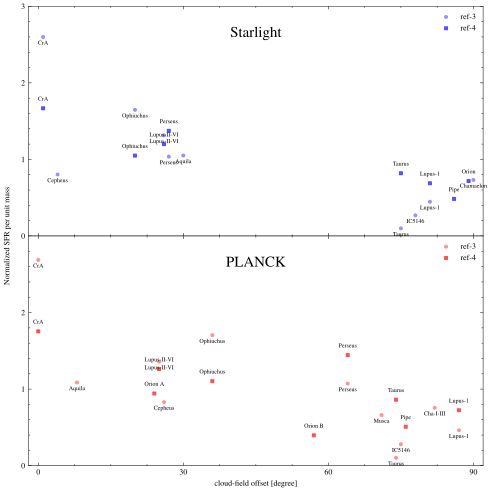

In [8]:
fig, ax = plt.subplots(2, 1, figsize = (7, 7), sharex = True)

criteria = np.logical_and(obs['cloud_name'] != 'Orion A', obs['cloud_name'] != 'Orion B')

clds = obs[f'cloud_name'][criteria]
x = obs[f'b_offset_optical'][criteria]
y1 = obs[f'sfr_3'][criteria]
y2 = obs[f'sfr_4'][criteria]

criteria1 = np.logical_and(~np.isnan(x), ~np.isnan(y1))
criteria2 = np.logical_and(~np.isnan(x), ~np.isnan(y2))

x1 = x[criteria1]
y1 = y1[criteria1]
x2 = x[criteria2]
y2 = y2[criteria2]

y1 /= np.nanmean(y1)
y2 /= np.nanmean(y2)

ax[0].scatter(x1, y1, marker = 'o', c = [[0.5,0.5,1,.8] for i in range(len(x1))], label = 'ref-3')
ax[0].scatter(x2, y2, marker = 's', c = [[0.2,0.2,1,.8] for i in range(len(x2))], label = 'ref-4')


for i in x.keys():
    if i in x1.keys():
        ax[0].text(x1[i], y1[i]-0.1, s = clds [i], fontsize = 6, ha = 'center', color = [0,0,0,1])
    if i in x2.keys():
        ax[0].text(x2[i], y2[i]+0.1, s = clds [i], fontsize = 6, ha = 'center', color = [0,0,0,1])

x = obs[f'b_offset_planck']
clds = obs[f'cloud_name']
y1 = obs[f'sfr_3']
y2 = obs[f'sfr_4']

criteria1 = np.logical_and(~np.isnan(x), ~np.isnan(y1))
criteria2 = np.logical_and(~np.isnan(x), ~np.isnan(y2))

x1 =  x[criteria1]
y1 = y1[criteria1]
x2 =  x[criteria2]
y2 = y2[criteria2]

y1 /= np.nanmean(y1)
y2 /= np.nanmean(y2)

ax[1].scatter(x1, y1, marker = 'o', c = [[1,0.5,0.5,.8] for i in range(len(x1))], label = 'ref-3')
ax[1].scatter(x2, y2, marker = 's', c = [[1,0.2,0.2,.8] for i in range(len(x2))], label = 'ref-4')

for i in x.keys():
    if i in x1.keys():
        ax[1].text(x1[i], y1[i]-0.1, s = clds [i], fontsize = 6, ha = 'center', color = [0,0,0,1])
    if i in x2.keys():
        ax[1].text(x2[i], y2[i]+0.1, s = clds [i], fontsize = 6, ha = 'center', color = [0,0,0,1])

for i in ax:
    i.set_ylim(0, 3)
    i.set_xlim(-2, 92)
    i.legend()

ax[0].text(45, 2.6, "Starlight", ha = 'center', fontsize = 15)
ax[1].text(45, 2.6, "PLANCK", ha = 'center', fontsize = 15)


ax[0].set_yticks([0, 1, 2, 3])
ax[1].set_yticks([0, 1, 2])
ax[1].set_xticks([0, 30, 60, 90])

fig.add_subplot(111, frameon=False)
plt.tight_layout()
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)

plt.xlabel('cloud-field offset [degree]')
plt.ylabel('Normalized SFR per unit mass')
plt.subplots_adjust(hspace = 0)
# plt.savefig('../images/obs_sfr_per_mass.png')
plt.show()


In [6]:
# !!!! be careful for the duplicated row!.
print(obs['sfr_3'][~np.isnan(obs['sfr_3'])].unique().size, obs['sfr_3'][~np.isnan(obs['sfr_3'])].size)
print(obs['sfr_4'][~np.isnan(obs['sfr_4'])].unique().size, obs['sfr_4'][~np.isnan(obs['sfr_4'])].size)

11 12
10 10


In [7]:
obs

,cloud_name,cloud_dir,b_dir_planck,b_dir_optical,mcf_slope,sfr_4,sfr_3
0,Lupus-1,-1,86.0,-82.0,0.188,4.00,0.63
1,Cha-I-III,22,-76.0,NaN,0.165,NaN,1.03
2,Pipe,-45,59.0,49.0,0.165,2.81,NaN
3,IC5146,-38,67.0,64.0,0.231,NaN,0.38
4,Taurus,75,1.0,0.0,0.176,4.76,0.14
5,Musca,27,-82.0,NaN,0.195,NaN,0.90
6,Perseus,32,-84.0,59.0,0.206,7.98,1.46
7,Orion B,-30,-87.0,7.0,0.132,2.19,NaN
8,Orion A,83,59.0,7.0,0.159,5.21,NaN
9,Ophiuchus,-45,-81.0,-65.0,0.096,6.10,2.32


In [8]:
obs.set_index("cloud_name", inplace = True)

In [9]:
obs_selected = obs.loc[["Lupus-1", "Cha-I-III", "Pipe", "IC5146", 
                        "Taurus", "Musca", "Perseus", "Orion B",
                        "Orion A", "Ophiuchus", "Lupus-II-VI", "Aquila", "CrA"]]

In [10]:
obs_selected['sfr_4_norm_'] = obs_selected['sfr_4'] / np.nanmean(obs_selected['sfr_4'])
obs_selected['sfr_3_norm_'] = obs_selected['sfr_3'] / np.nanmean(obs_selected['sfr_3'])

In [11]:
obs_selected['sfr_comb'] = np.nanmean([obs_selected['sfr_4_norm_'], obs_selected['sfr_3_norm_']], axis=0)

In [12]:
obs_selected['sfr_comb'] /= np.mean(obs_selected['sfr_comb'])

In [13]:
obs_selected['sfr_comb']

cloud_name
Lupus-1        0.649903
Cha-I-III      0.819833
Pipe           0.560845
IC5146         0.302463
Taurus         0.530739
Musca          0.716359
Perseus        1.377406
Orion B        0.437100
Orion A        1.039858
Ophiuchus      1.532053
Lupus-II-VI    1.431825
Aquila         1.178012
CrA            2.423604
Name: sfr_comb, dtype: float64

In [16]:
# combine data from SFR ref 3 and ref 4

# normalize by each group's mean.
obs['sfr_4_norm'] = obs['sfr_4'] / np.nanmean(obs['sfr_4'].unique())
obs['sfr_3_norm'] = obs['sfr_3'] / np.nanmean(obs['sfr_3'].unique())


# combine the data.
obs['sfr_comb'] = np.nanmean([obs['sfr_4_norm'], obs['sfr_3_norm']], axis=0)

obs

,cloud_dir,b_dir_planck,b_dir_optical,mcf_slope,sfr_4,sfr_3,sfr_4_norm,sfr_3_norm,sfr_comb
cloud_name,,,,,,,,,
Lupus-1,-1,86.0,-82.0,0.188,4.00,0.63,0.742390,0.462617,0.602504
Cha-I-III,22,-76.0,NaN,0.165,NaN,1.03,NaN,0.756342,0.756342
Pipe,-45,59.0,49.0,0.165,2.81,NaN,0.521529,NaN,0.521529
IC5146,-38,67.0,64.0,0.231,NaN,0.38,NaN,0.279039,0.279039
Taurus,75,1.0,0.0,0.176,4.76,0.14,0.883445,0.102804,0.493124
Musca,27,-82.0,NaN,0.195,NaN,0.90,NaN,0.660881,0.660881
Perseus,32,-84.0,59.0,0.206,7.98,1.46,1.481069,1.072096,1.276583
Orion B,-30,-87.0,7.0,0.132,2.19,NaN,0.406459,NaN,0.406459
Orion A,83,59.0,7.0,0.159,5.21,NaN,0.966964,NaN,0.966964


In [18]:
obs['sfr_3']

cloud_name
Lupus-1        0.63
Cha-I-III      1.03
Pipe            NaN
IC5146         0.38
Taurus         0.14
Musca          0.90
Perseus        1.46
Orion B         NaN
Orion A         NaN
Ophiuchus      2.32
Lupus-II-VI    1.85
Aquila         1.48
CrA            3.66
Cepheus        1.13
Chamaelon      1.03
Orion           NaN
Name: sfr_3, dtype: float64

In [67]:
obs_selected2 = obs.loc[["Lupus-1", "Cha-I-III", "Pipe", "IC5146", 
                        "Taurus", "Musca", "Perseus", "Orion B",
                        "Orion A", "Ophiuchus", "Lupus-II-VI", "Aquila", "CrA"]]

In [71]:
obs_selected2['sfr_comb'] /= np.mean(obs_selected2['sfr_comb'])
obs_selected['sfr_comb']

cloud_name
Lupus-1        0.649903
Cha-I-III      0.819833
Pipe           0.560845
IC5146         0.302463
Taurus         0.530739
Musca          0.716359
Perseus        1.377406
Orion B        0.437100
Orion A        1.039858
Ophiuchus      1.532053
Lupus-II-VI    1.431825
Aquila         1.178012
CrA            2.423604
Name: sfr_comb, dtype: float64

In [70]:
obs_selected2['sfr_comb'] 

cloud_name
Lupus-1        0.650698
Cha-I-III      0.816842
Pipe           0.563247
IC5146         0.301359
Taurus         0.532570
Musca          0.713746
Perseus        1.378697
Orion B        0.438972
Orion A        1.044312
Ophiuchus      1.531292
Lupus-II-VI    1.432118
Aquila         1.173715
CrA            2.422432
Name: sfr_comb, dtype: float64

In [65]:
# mask = np.logical_and(obs.index != 'Orion', obs.index != 'Cepheus', obs.index != 'Chamaelon')

In [66]:
obs

,cloud_dir,b_dir_planck,b_dir_optical,mcf_slope,sfr_4,sfr_3,sfr_4_norm,sfr_3_norm,sfr_comb
cloud_name,,,,,,,,,
Lupus-1,-1,86.0,-82.0,0.188,4.00,0.63,0.742390,0.462617,0.602504
Cha-I-III,22,-76.0,NaN,0.165,NaN,1.03,NaN,0.756342,0.756342
Pipe,-45,59.0,49.0,0.165,2.81,NaN,0.521529,NaN,0.521529
IC5146,-38,67.0,64.0,0.231,NaN,0.38,NaN,0.279039,0.279039
Taurus,75,1.0,0.0,0.176,4.76,0.14,0.883445,0.102804,0.493124
Musca,27,-82.0,NaN,0.195,NaN,0.90,NaN,0.660881,0.660881
Perseus,32,-84.0,59.0,0.206,7.98,1.46,1.481069,1.072096,1.276583
Orion B,-30,-87.0,7.0,0.132,2.19,NaN,0.406459,NaN,0.406459
Orion A,83,59.0,7.0,0.159,5.21,NaN,0.966964,NaN,0.966964


In [33]:
obs[~mask]

TypeError: ufunc 'invert' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

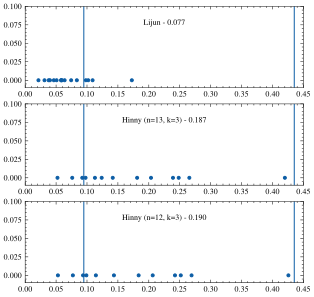

In [108]:
fig, ax = plt.subplots(3, 1)


lij = 0.07692307708618304
h13 = 0.1872967120551596
h12 = 0.18983876402114386

titles = [f'Lijun - {lij:.3f}', f'Hinny (n=13, k=3) - {h13:.3f}', f'Hinny (n=12, k=3) - {h12:.3f}']

# 0.07692307708618304
ax[0].scatter(obs['sfr_comb'] * lij, np.zeros_like(obs['sfr_comb']))

ax[1].scatter(planck_table['sfr_comb'] * h13, np.zeros_like(planck_table['sfr_comb']))

ax[2].scatter(optical_table['sfr_comb'] * h12, np.zeros_like(optical_table['sfr_comb']))

# ax[0].vlines(obs['sfr_comb'][obs['b_offset_optical'] < 45]*0.07692307708618304, np.zeros_like(obs['sfr_comb']))


# ax[1].scatter(obs['sfr_comb']*2.434857256717075, np.zeros_like(obs['sfr_comb']))



for i in range(3):
    
    # ax[i].set_ylabel(titles[i])
    ax[i].vlines(0.43529950557240055, -0.1, 0.1)
    ax[i].vlines(0.09486182914283382, -0.1, 0.1)
    ax[i].text(0.45/2, 0.075, s = titles[i], ha='center')
    ax[i].set_ylim(-0.01, 0.1)
    ax[i].set_xlim(0.0, 0.45)

plt.show()

In [11]:
pd.options.display.float_format = '{:,.2f}'.format
obs[['cloud_name', 'b_offset_planck', 'b_offset_optical', 'mcf_slope', 'sfr_3', 'sfr_3_norm', 'sfr_4', 'sfr_4_norm', 'sfr_comb']]

,cloud_name,b_offset_planck,b_offset_optical,mcf_slope,sfr_3,sfr_3_norm,sfr_4,sfr_4_norm,sfr_comb
0,Lupus-1,87.00,81.00,0.19,0.63,0.46,4.00,0.74,0.60
1,Cha-I-III,82.00,NaN,0.17,1.03,0.76,NaN,NaN,0.76
2,Pipe,76.00,86.00,0.17,NaN,NaN,2.81,0.52,0.52
3,IC5146,75.00,78.00,0.23,0.38,0.28,NaN,NaN,0.28
4,Taurus,74.00,75.00,0.18,0.14,0.10,4.76,0.88,0.49
5,Musca,71.00,NaN,0.20,0.90,0.66,NaN,NaN,0.66
6,Perseus,64.00,27.00,0.21,1.46,1.07,7.98,1.48,1.28
7,Orion B,57.00,37.00,0.13,NaN,NaN,2.19,0.41,0.41
8,Orion A,24.00,76.00,0.16,NaN,NaN,5.21,0.97,0.97
9,Ophiuchus,36.00,20.00,0.10,2.32,1.70,6.10,1.13,1.42


In [12]:
planck_table = obs[['cloud_name', 'b_offset_planck','mcf_slope','sfr_comb']][
    ~np.isnan(obs['mcf_slope']) & ~np.isnan(obs['mcf_slope']) & ~np.isnan(obs['b_offset_planck'])].copy()

planck_table = planck_table.rename(columns={'b_offset_planck': 'b_offset'})
planck_table

,cloud_name,b_offset,mcf_slope,sfr_comb
0,Lupus-1,87.00,0.19,0.60
1,Cha-I-III,82.00,0.17,0.76
2,Pipe,76.00,0.17,0.52
3,IC5146,75.00,0.23,0.28
4,Taurus,74.00,0.18,0.49
5,Musca,71.00,0.20,0.66
6,Perseus,64.00,0.21,1.28
7,Orion B,57.00,0.13,0.41
8,Orion A,24.00,0.16,0.97
9,Ophiuchus,36.00,0.10,1.42


In [13]:
optical_table = obs[['cloud_name', 'b_offset_optical', 'mcf_slope', 'sfr_comb']][
    ~np.isnan(obs['mcf_slope']) & ~np.isnan(obs['mcf_slope']) & ~np.isnan(obs['b_offset_optical'])].copy()

optical_table = optical_table.rename(columns={'b_offset_optical': 'b_offset'})
optical_table

,cloud_name,b_offset,mcf_slope,sfr_comb
0,Lupus-1,81.00,0.19,0.60
2,Pipe,86.00,0.17,0.52
3,IC5146,78.00,0.23,0.28
4,Taurus,75.00,0.18,0.49
6,Perseus,27.00,0.21,1.28
7,Orion B,37.00,0.13,0.41
8,Orion A,76.00,0.16,0.97
9,Ophiuchus,20.00,0.10,1.42
10,Lupus-II-VI,26.00,0.17,1.33
11,Aquila,30.00,0.10,1.09


In [14]:
def error_propagate(a: np.ndarray, b: np.ndarray, c: np.ndarray) -> float:
    """
        calculate the standard error for the following equation:
        f(a, b, c) = (mean(b) - mean(a)) / mean(c)
    """
    
    # standard error of each mean.
    var_a = np.std(a)**2/a.size
    var_b = np.std(b)**2/b.size
    var_c = np.std(c)**2/c.size
    
    # mean of each array.
    mean_a = np.mean(a)
    mean_b = np.mean(b)
    mean_c = np.mean(c)

    # error propagate.
    A = (1/mean_c)**2 * var_a
    B = (1/mean_c)**2 * var_b
    C = ((mean_b - mean_a)/mean_c)**2 * var_c
    
    return np.sqrt(A + B + C)

In [15]:
relative_mcf_different_planck = (np.mean(planck_table['mcf_slope'][planck_table['b_offset'] > 45]) -
                                 np.mean(planck_table['mcf_slope'][planck_table['b_offset'] < 45])) / np.mean(planck_table['mcf_slope'])

relative_mcf_different_planck_err = error_propagate(
    planck_table['mcf_slope'][planck_table['b_offset'] < 45],
    planck_table['mcf_slope'][planck_table['b_offset'] > 45],
    planck_table['mcf_slope'])


relative_mcf_different_optical = (np.mean(optical_table['mcf_slope'][optical_table['b_offset'] > 45]) -
                                  np.mean(optical_table['mcf_slope'][optical_table['b_offset'] < 45])) / np.mean(optical_table['mcf_slope'])

relative_mcf_different_optical_err = error_propagate(
    optical_table['mcf_slope'][optical_table['b_offset'] < 45],
    optical_table['mcf_slope'][optical_table['b_offset'] > 45],
    optical_table['mcf_slope'])

print(f"Relative MCF slope different for plancks data: {relative_mcf_different_planck:25.20f} +- {relative_mcf_different_planck_err:25.20f}")
print(f"Relative MCF slope different for optical data: {relative_mcf_different_optical:25.20f} +- {relative_mcf_different_optical_err:25.20f}")


Relative MCF slope different for plancks data:    0.30980160604629192189 +-    0.10110408944998323932
Relative MCF slope different for optical data:    0.25598335067637884022 +-    0.11532147170719482532


In [16]:
relative_sfe_different_planck = (np.mean(planck_table['sfr_comb'][planck_table['b_offset'] > 45]) - \
    np.mean(planck_table['sfr_comb'][planck_table['b_offset'] < 45])) / np.mean(planck_table['sfr_comb'])

relative_sfe_different_planck_err = error_propagate(
    planck_table['sfr_comb'][planck_table['b_offset'] < 45],
    planck_table['sfr_comb'][planck_table['b_offset'] > 45],
    planck_table['sfr_comb'])

relative_sfe_different_optical = (np.mean(optical_table['sfr_comb'][optical_table['b_offset'] > 45]) - \
    np.mean(optical_table['sfr_comb'][optical_table['b_offset'] < 45])) / np.mean(optical_table['sfr_comb'])

relative_sfe_different_optical_err = error_propagate(
    optical_table['sfr_comb'][optical_table['b_offset'] < 45],
    optical_table['sfr_comb'][optical_table['b_offset'] > 45],
    optical_table['sfr_comb'])

print(f"Relative SFE different for plancks data: {relative_sfe_different_planck:.20f} +- {relative_sfe_different_planck_err:.20f}")
print(f"Relative SFE different for optical data: {relative_sfe_different_optical:.20f} +- {relative_sfe_different_optical_err:.20f}")


Relative SFE different for plancks data: -0.84625749795768490102 +- 0.27082182081083627789
Relative SFE different for optical data: -0.72734920072607889274 +- 0.27451288585330863024


In [17]:
np.mean(optical_table['sfr_comb'])

0.9480215970547547

In [18]:
np.mean(planck_table['sfr_comb'])

0.9259338722736097